<a href="https://colab.research.google.com/github/gajanankumar/Regression_Capstone_Project/blob/branch2/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## <b> Data Information </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>
Dataset contains 8760 rows and 14 columns 

### <b>Attribute Information: </b>

* ### Date : year-month-day(object)
* ### Rented Bike count - Count of bikes rented at each hour(Integer)
* ### Hour - Hour of he day(Integer)
* ### Temperature-Temperature in Celsius(Numeric)
* ### Humidity - %(Integer)
* ### Windspeed - m/s(Numeric)
* ### Visibility - 10m (Integer)
* ### Dew point temperature - Celsius (Numeric)
* ### Solar radiation - MJ/m2(Numeric)
* ### Rainfall - mm(Numeric)
* ### Snowfall - cm(Numeric)
* ### Seasons - Winter, Spring, Summer, Autumn(object)
* ### Holiday - Holiday/No holiday(object)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)(object)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from numpy import math

import warnings
warnings.filterwarnings('ignore')

**Importing dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/mlprojects/SeoulBikeData.csv',encoding='cp1252')

### Exploring Data

In [4]:
#Getting first 5 records from dataset
dataset.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
dataset.tail() # fetching last 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
dataset.info() # Getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above infomation we conclude that dataset contains 14 columns and 8760 records. it contains all records non null.

In [7]:
dataset.describe() # getting statistical summary about numerical features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
dataset.describe(include='all') # getting statistical summary including all features

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**checking duplicate values**

In [9]:
#chcking duplicate records in dataset
len(dataset[dataset.duplicated()])

0

**Checking for null values**

In [10]:
dataset.isna().sum() # checking missing values in dataset

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
# checking unique values 
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**From above result we conclude that here in this dataset no missing values and not any duplicated records present.**

In [12]:
dataset.columns # checking features names

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Renaming columns for convinence 
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [14]:
dataset.columns # checking features names

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [15]:
dataset['Seasons'].value_counts() # checking seasons value counts

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
dataset['Functioning_Day'].value_counts() # checking Functioning_Day value counts

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [17]:
dataset['Holiday'].value_counts()  # checking Holiday value counts

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

##Exploratory data analysys

In [18]:
dataset.columns # checking columns in dataset

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [19]:
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [20]:
# Changing date feature datatype to datetime

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'].dtype

dtype('<M8[ns]')

In [21]:
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [22]:
# making new columns in dataframe from date column
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month

dataset['day'] = dataset['Date'].dt.day_name()

In [23]:
dataset['day']

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
8755      Friday
8756      Friday
8757      Friday
8758      Friday
8759      Friday
Name: day, Length: 8760, dtype: object

In [24]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
dataset['weekday_weekend']=dataset['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [25]:
# checking no of weekdays and weekends
dataset['weekday_weekend'].value_counts()

weekday    6216
weekend    2544
Name: weekday_weekend, dtype: int64

In [26]:
#Change the int64 column into catagory column
cols=['Hour','month']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

we convert the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

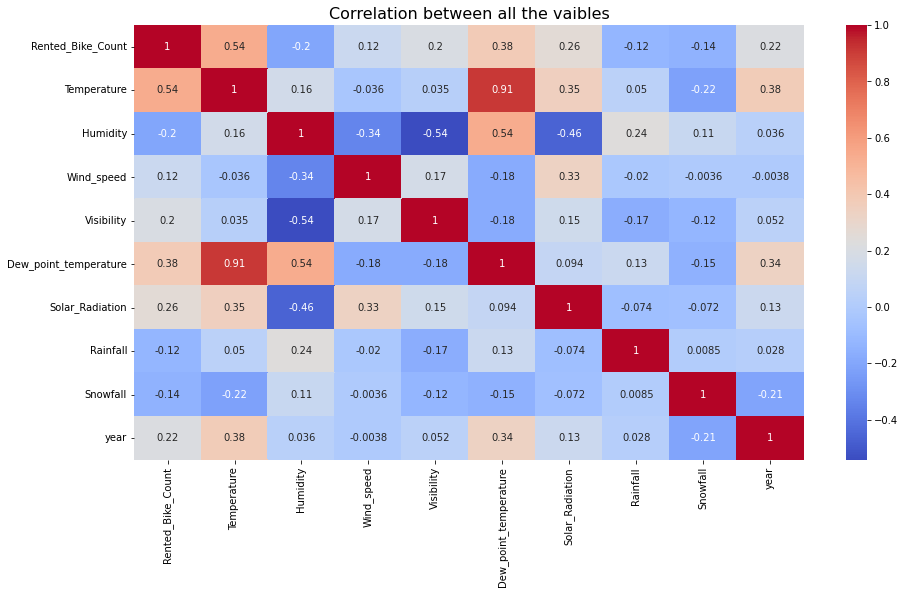

In [28]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

### Obeservations:
##### Dew point temperature and temperature are highly related.
###### Humidity has low correlation with visibility due to solar radiation.

In [29]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Snowfall',
 'Rented_Bike_Count',
 'Rainfall',
 'Visibility',
 'Solar_Radiation',
 'Wind_speed',
 'Humidity',
 'Dew_point_temperature',
 'Temperature',
 'year']

**Multicolinearity check**

In [30]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

                 feature     VIF
0               Snowfall    1.13
1      Rented_Bike_Count    3.64
2               Rainfall    1.11
3             Visibility   10.24
4        Solar_Radiation    2.89
5             Wind_speed    4.58
6               Humidity  188.20
7  Dew_point_temperature  126.71
8            Temperature  189.13
9                   year  397.72


**Here VIF for  Dew_point_temperature and Temperature greater than 10 so need to drop one of them.
Here temperature is importanat compaired to dew point temperature.**

In [31]:
# Droping highly correlated features for eleminating Multico-linearity
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

###**Univariate Analysis :**

In [32]:
# cateogrical feature 

cat_features = list(set(dataset.describe(include = 'all')) - set(dataset.describe()))
cat_features

['Hour',
 'weekday_weekend',
 'Functioning_Day',
 'Seasons',
 'Holiday',
 'Date',
 'month',
 'day']

In [33]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Snowfall',
 'Rented_Bike_Count',
 'Rainfall',
 'Visibility',
 'Solar_Radiation',
 'Wind_speed',
 'Humidity',
 'Temperature',
 'year']

In [34]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

             feature    VIF
0           Snowfall   1.12
1  Rented_Bike_Count   3.64
2           Rainfall   1.10
3         Visibility  10.16
4    Solar_Radiation   2.76
5         Wind_speed   4.57
6           Humidity  23.66
7        Temperature   4.92
8               year  50.34


**Checking Skewness in features**

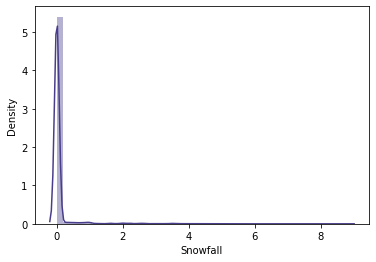

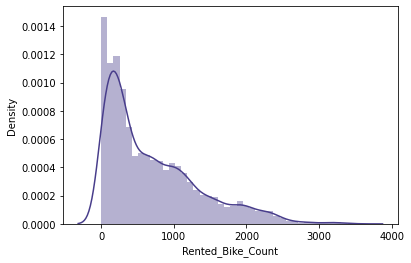

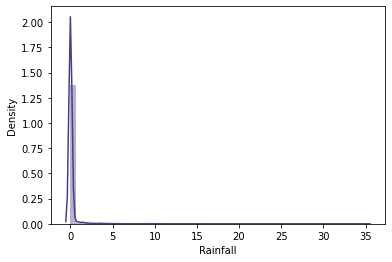

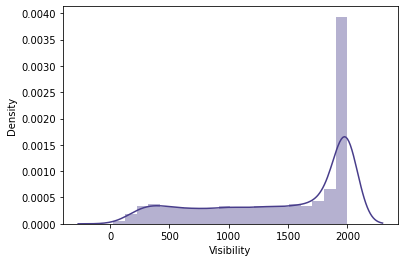

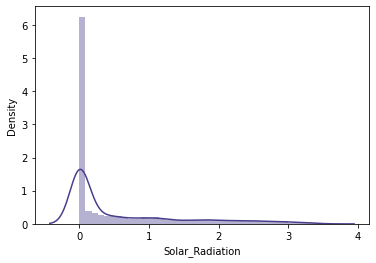

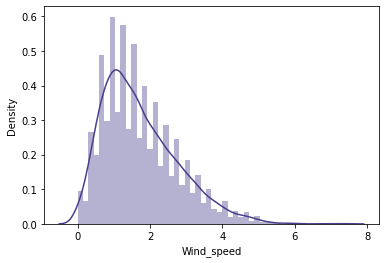

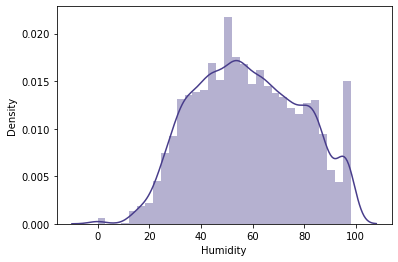

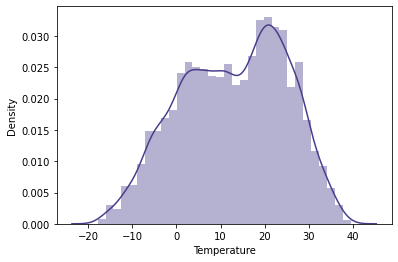

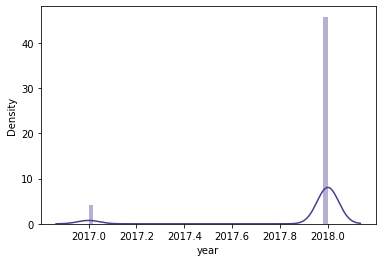

In [35]:
#plotting distplots to analyze the distribution of all numerical features
for feat in num_features:
  plt.figure(figsize=(6,4))
  sns.distplot(x=dataset[feat],color= 'darkslateblue')
  plt.xlabel(feat)
plt.show()

**From above plot we conclude that for some fetures distributions are rightly skewed and for some leftly skewed.**

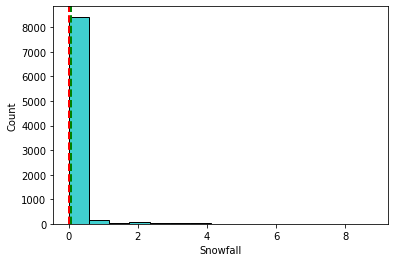

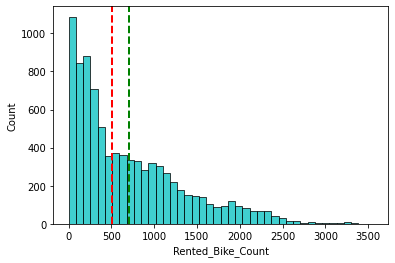

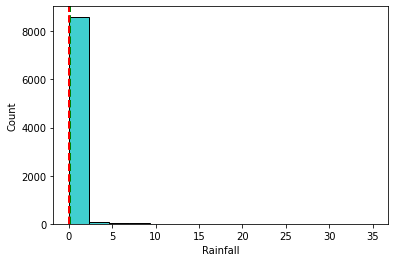

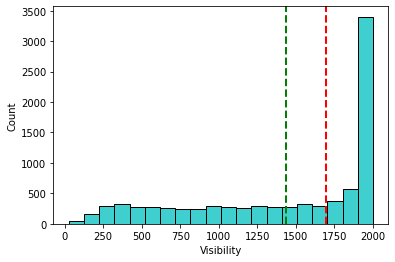

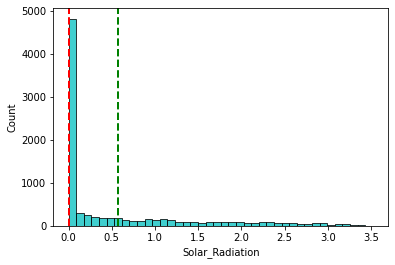

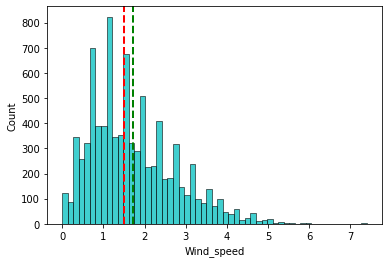

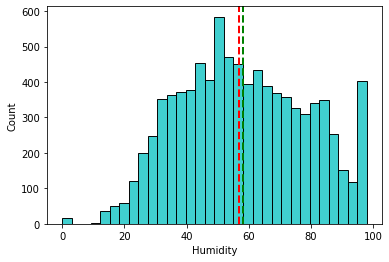

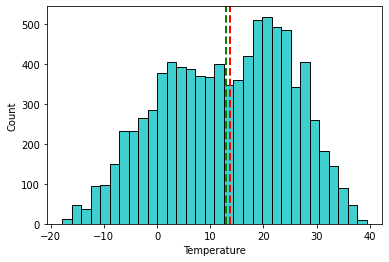

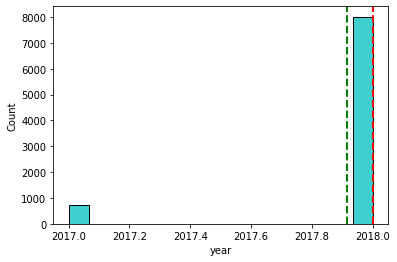

In [36]:
#plotting histogram with mean and median

for col in num_features:
  sns.histplot(dataset[col],color= 'c')
  plt.axvline(dataset[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

**The features which are skewed, their mean and the median are also skewed.**
**Rented_bike_count is right skewed.**

**Outliers Detection using Box plot**

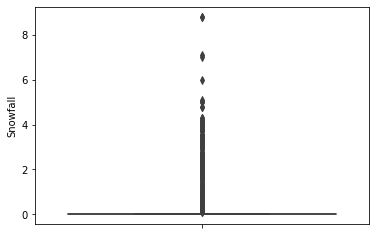

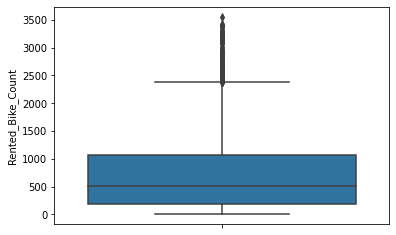

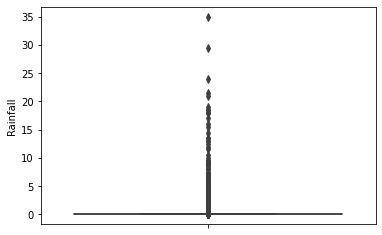

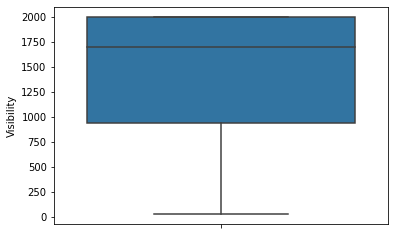

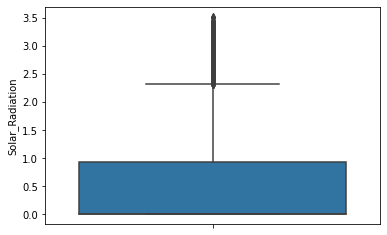

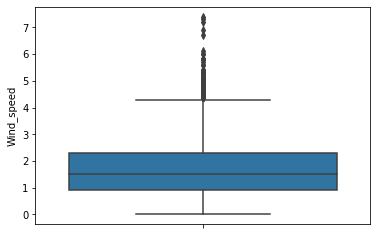

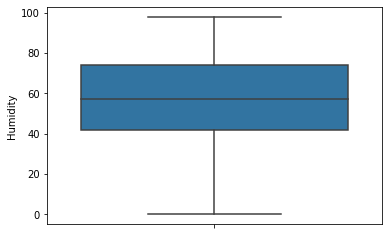

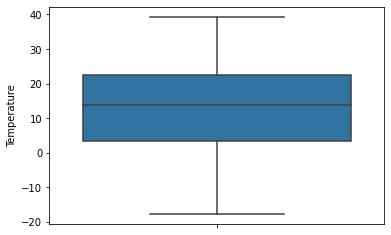

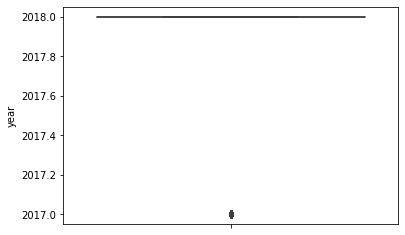

In [37]:
# Numerical features plotting Box plot
for nfet in num_features:
    sns.boxplot(y = dataset[nfet])
    plt.show()

In [38]:
dataset.isna().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
year                 0
month                0
day                  0
weekday_weekend      0
dtype: int64

In [39]:
# finding the inter-quartile range 

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented_Bike_Count     874.25
Temperature            19.00
Humidity               32.00
Wind_speed              1.40
Visibility           1060.00
Solar_Radiation         0.93
Rainfall                0.00
Snowfall                0.00
year                    0.00
dtype: float64


**Outlier Treatment**

In [40]:
# function to check outliers in dataset columns
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)                                                        #sorting dataset column
    q1 = np.percentile(data, 25)                                             # calculating 25th percentile
    q3 = np.percentile(data, 75)                                          # calculating 75th percentile
    # print(q1, q3)
    IQR = q3-q1                                                             # calculating Interquartile range
    lwr_bound = q1-(1.5*IQR)                                             # calculating lower bound in box plot
    print( "lwr_bound:",lwr_bound ) 
    upr_bound = q3+(1.5*IQR)                                             # calculating Upper bound in box plot
    print("upper_bound",upr_bound )
    # print(lwr_bound, upr_bound)
    # Computing 5th, 90th percentiles and replacing the outliers
    fifth_percentile = np.percentile(data,5)                               # calculating 5th percentile
    ninetyfifth_percentile = np.percentile(data,98)                         # calculating 98th percentile
    print("5th and 98th percentile:",fifth_percentile, ninetyfifth_percentile)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):                              # condition to check outliers
            outliers.append(i)                                      # appending outliers found in column in list
    return outliers# Driver code


In [41]:
# calling function to check outliers
sample_outliers = detect_outliers_iqr(dataset['Wind_speed'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1.1999999999999997
upper_bound 4.3999999999999995
5th and 98th percentile: 0.4 4.3
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4]


In [42]:
dataset['Wind_speed']

0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8755    2.6
8756    2.3
8757    0.3
8758    1.0
8759    1.3
Name: Wind_speed, Length: 8760, dtype: float64

In [43]:
# Computing 5th, 90th percentiles and replacing the outliers
fifth_percentile = np.percentile(dataset['Wind_speed'], 5)
ninetyfifth_percentile = np.percentile(dataset['Wind_speed'], 98)
print(fifth_percentile, ninetyfifth_percentile)
#b = np.where(dataset['Wind_speed']>ninetyfifth_percentile)
q1 = np.percentile(dataset['Wind_speed'], 25)
q3 = np.percentile(dataset['Wind_speed'], 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
print( lwr_bound )
upr_bound = q3+(1.5*IQR)
print(upr_bound )
print(dataset['Wind_speed'][82:90])
dataset["Wind_speed"].mask(dataset["Wind_speed"] >upr_bound, ninetyfifth_percentile, inplace=True) # replacing outliers with 95th percentile
dataset["Wind_speed"].mask(dataset["Wind_speed"] <lwr_bound,fifth_percentile, inplace=True)        # replacing outliers with 5th percentile
print(dataset['Wind_speed'][82:90])


0.4 4.3
-1.1999999999999997
4.3999999999999995
82    4.5
83    4.1
84    4.8
85    5.4
86    4.5
87    5.8
88    4.7
89    5.3
Name: Wind_speed, dtype: float64
82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64


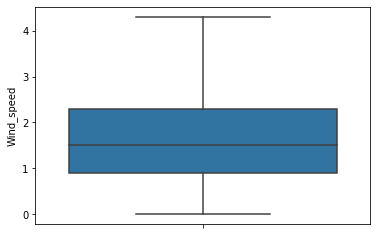

In [44]:

sns.boxplot(y = dataset['Wind_speed'])
plt.show()

In [45]:
print(dataset['Wind_speed'][82:90]) # cross checking values replaced

82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64


In [46]:
sample_outliers = detect_outliers_iqr(dataset['Solar_Radiation']) # calling function to check outliers
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1.395
upper_bound 2.325
5th and 98th percentile: 0.0 2.96
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2

In [47]:
# Computing 5th, 90th percentiles and replacing the outliers
def Outliers_imputing(lp,up,data):
  fifth_percentile = np.percentile(data,lp)              #calculating lower percentile
  ninetyfifth_percentile = np.percentile(data,up)        #calculating greater percentile
  print("5th and 98th percentile:",fifth_percentile, ninetyfifth_percentile)
  #b = np.where(dataset['Wind_speed']>ninetyfifth_percentile)
  q1 = np.percentile(data, 25)                           #calculating 25th percentile
  q3 = np.percentile(data,75)                            #calculating 75th percentile
  # print(q1, q3)
  IQR = q3-q1                                           #calculating inter quartile range
  lwr_bound = q1-(1.5*IQR)                              #calculating lower bound
  print( "Lower_bound:",lwr_bound )
  upr_bound = q3+(1.5*IQR)                                #calculating upper  bound
  print("Upper_bound:",upr_bound )
  #print(dataset['Wind_speed'][82:90])
  b=np.where(data >upr_bound)                          #Finding outliers place
  print(b)
  b=np.where(data <lwr_bound)                           #Finding outliers index
  print(b)
  data.mask(data >upr_bound, ninetyfifth_percentile, inplace=True)   #repalcing outliers
  data.mask(data <lwr_bound,fifth_percentile, inplace=True)          #repalcing outliers
  #print(dataset['Wind_speed'][82:90])
  return data

In [48]:
outr=Outliers_imputing(5,92,dataset['Solar_Radiation'])  # calling function to replace outliers
outr

5th and 98th percentile: 0.0 2.27
Lower_bound: -1.395
Upper_bound: 2.325
(array([1741, 1885, 1886, 1982, 2054, 2077, 2078, 2100, 2101, 2102, 2172,
       2173, 2174, 2175, 2196, 2197, 2198, 2199, 2220, 2221, 2222, 2223,
       2270, 2271, 2292, 2293, 2388, 2389, 2390, 2412, 2413, 2414, 2415,
       2460, 2461, 2462, 2485, 2486, 2531, 2532, 2533, 2534, 2535, 2556,
       2559, 2627, 2628, 2675, 2676, 2677, 2678, 2679, 2700, 2701, 2702,
       2703, 2725, 2726, 2748, 2749, 2750, 2772, 2773, 2774, 2775, 2797,
       2867, 2868, 2869, 2870, 2871, 2892, 2893, 2894, 2988, 2989, 2990,
       2991, 3061, 3062, 3107, 3108, 3109, 3110, 3111, 3131, 3132, 3133,
       3155, 3156, 3157, 3158, 3159, 3160, 3179, 3180, 3181, 3182, 3183,
       3184, 3252, 3253, 3275, 3276, 3277, 3278, 3279, 3299, 3300, 3301,
       3302, 3303, 3323, 3324, 3325, 3326, 3327, 3347, 3348, 3349, 3350,
       3351, 3371, 3372, 3373, 3374, 3375, 3395, 3396, 3397, 3398, 3399,
       3400, 3491, 3492, 3493, 3494, 3495, 3516, 3

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Solar_Radiation, Length: 8760, dtype: float64

In [49]:
dataset['Solar_Radiation'].loc[1741]      

2.27

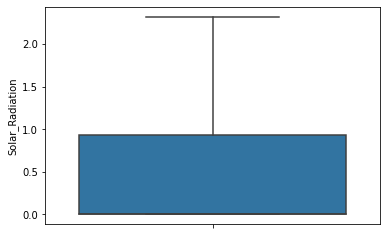

In [50]:
sns.boxplot(y = dataset['Solar_Radiation'])
plt.show()

In [51]:
sample_outliers = detect_outliers_iqr(dataset['Rented_Bike_Count'])  # calling function to check outliers
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1120.375
upper_bound 2376.625
5th and 98th percentile: 22.0 2355.0
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34

In [52]:
outr=Outliers_imputing(5,98,dataset['Rented_Bike_Count']) # calling function to replace outliers
outr

5th and 98th percentile: 22.0 2355.0
Lower_bound: -1120.375
Upper_bound: 2376.625
(array([2946, 2994, 3114, 3210, 3282, 3498, 3522, 3546, 3618, 3714, 3785,
       3834, 3835, 3882, 3928, 3929, 3954, 3978, 4072, 4074, 4098, 4122,
       4123, 4170, 4171, 4194, 4218, 4290, 4291, 4338, 4339, 4362, 4363,
       4386, 4387, 4435, 4436, 4458, 4459, 4460, 4461, 4482, 4483, 4485,
       4530, 4531, 4554, 4555, 4556, 4601, 4640, 4650, 4651, 4652, 4653,
       4672, 4673, 4674, 4675, 4698, 4721, 4722, 4723, 4724, 4745, 4746,
       4747, 4748, 4749, 4770, 4771, 4772, 4796, 4808, 4818, 4819, 4820,
       4821, 4832, 4842, 4843, 4844, 4866, 4867, 4868, 4869, 4890, 4891,
       4892, 4940, 4962, 4963, 4964, 5010, 5011, 5058, 5059, 5154, 5155,
       5156, 5178, 5179, 5180, 5202, 5226, 5227, 5346, 5370, 5394, 5466,
       5490, 5514, 5538, 5562, 5634, 5682, 6210, 6234, 6306, 6330, 6354,
       6570, 6666, 6667, 6690, 6691, 6714, 6738, 6810, 6811, 6834, 6835,
       6848, 6858, 6859, 6882, 6906, 6978

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [53]:
dataset['Rented_Bike_Count'][2946]

2355

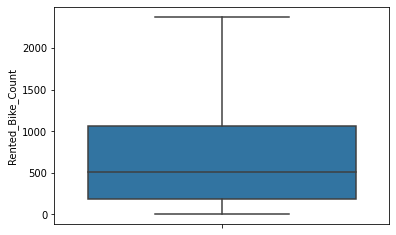

In [54]:
sns.boxplot(y = dataset['Rented_Bike_Count']) # checking outliers after replacement
plt.show()

In [55]:
#'Rainfall',
#'Snowfall'
sample_outliers = detect_outliers_iqr(dataset['Rainfall']) # calling function to check outliers with iqr method
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: 0.0
upper_bound 0.0
5th and 98th percentile: 0.0 2.0
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2

In [56]:
dataset['Rainfall'].mean()

0.14868721461187215

In [57]:
sample_outliers = detect_outliers_iqr(dataset['Snowfall'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: 0.0
upper_bound 0.0
5th and 98th percentile: 0.0 1.3
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2

In [58]:
dataset.isna().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
year                 0
month                0
day                  0
weekday_weekend      0
dtype: int64

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented_Bike_Count  8760 non-null   int64         
 2   Hour               8760 non-null   category      
 3   Temperature        8760 non-null   float64       
 4   Humidity           8760 non-null   int64         
 5   Wind_speed         8760 non-null   float64       
 6   Visibility         8760 non-null   int64         
 7   Solar_Radiation    8760 non-null   float64       
 8   Rainfall           8760 non-null   float64       
 9   Snowfall           8760 non-null   float64       
 10  Seasons            8760 non-null   object        
 11  Holiday            8760 non-null   object        
 12  Functioning_Day    8760 non-null   object        
 13  year               8760 non-null   int64         
 14  month   

**From above box plot we conclude that outliers are found in Rented_Bike_Count, Wind_speed, in snowfall and rainfall.**

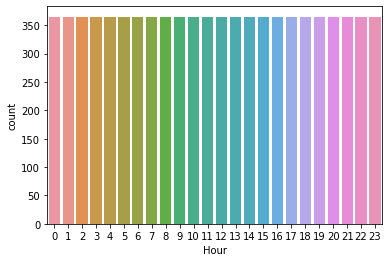

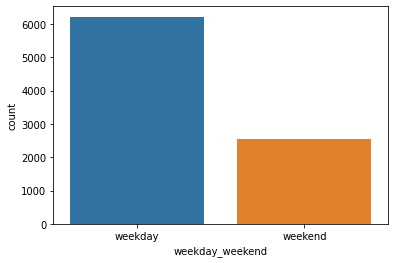

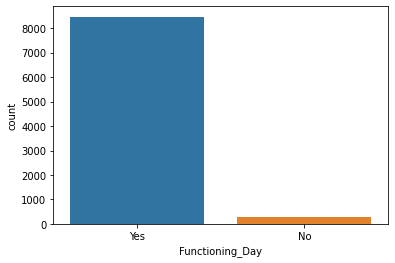

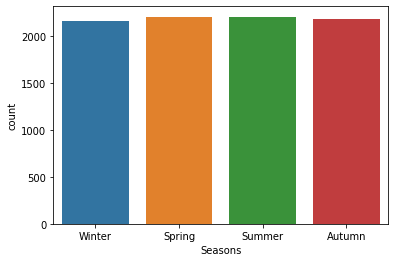

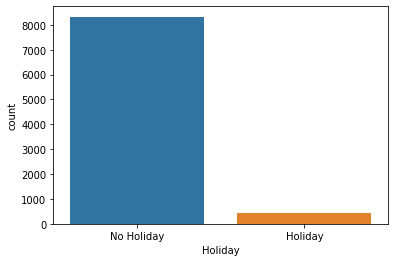

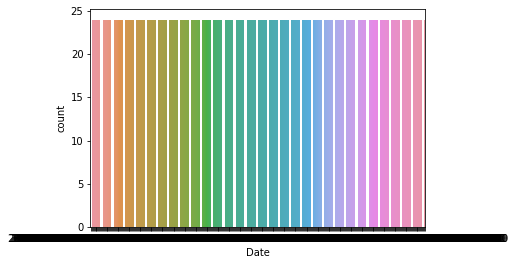

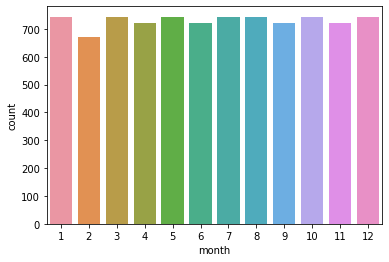

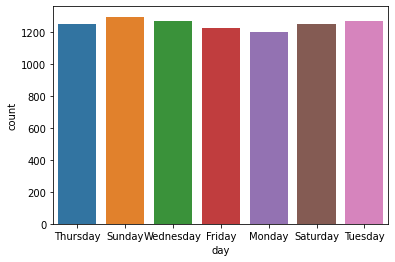

In [60]:
# bar plot for categorical features
for catf in cat_features :
    sns.countplot(x = dataset[catf],)
    plt.show()

###**Bivariate Analysis :**

In [61]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'year', 'month', 'day',
       'weekday_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

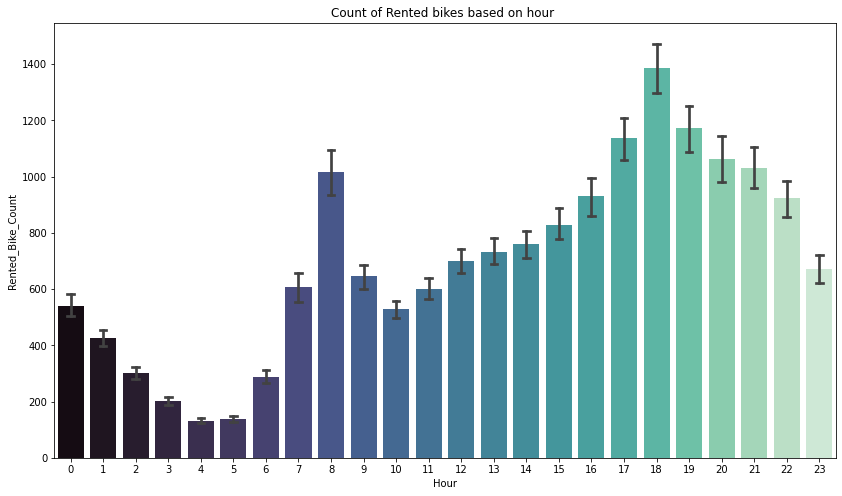

In [62]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

**From above bar plot we conclude that People generally use rented bikes in morning from 7am to 9am and at evening time 5pm to 8pm.**

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays')]

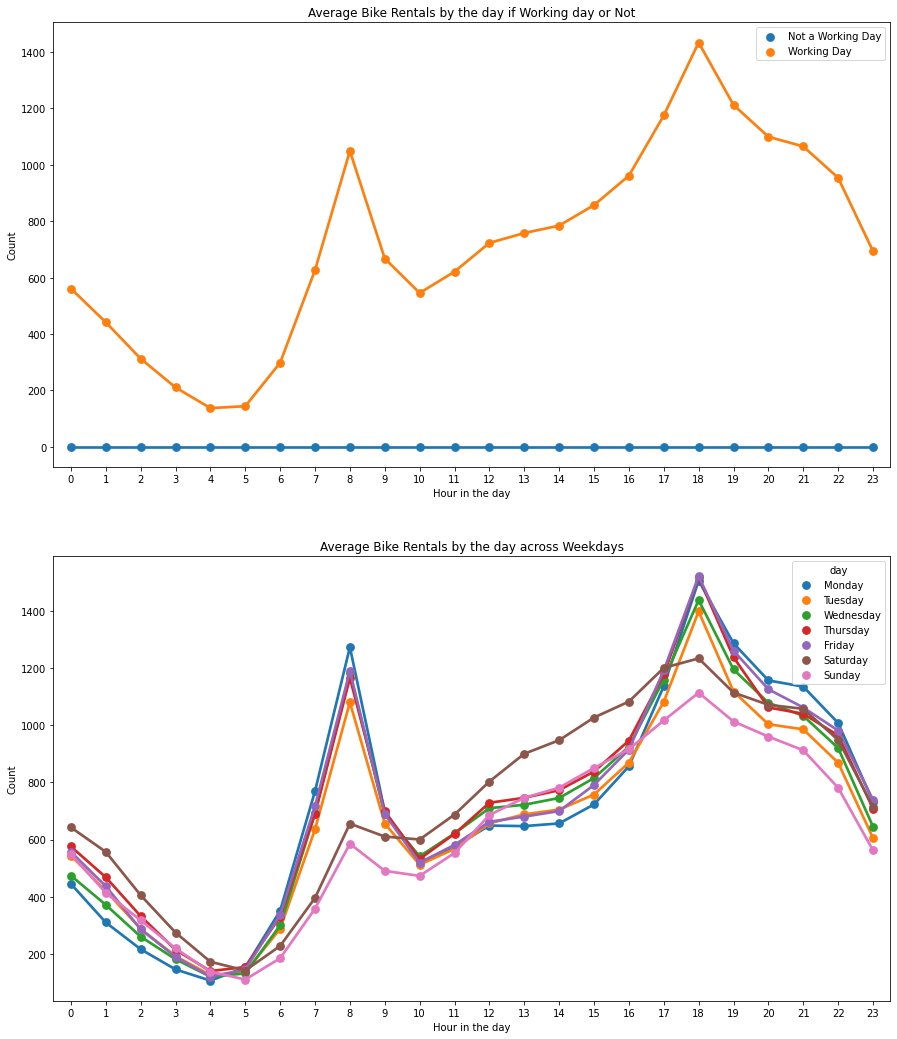

In [63]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(dataset.groupby(['Functioning_Day', 'Hour'])['Rented_Bike_Count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='Hour', y='Rented_Bike_Count', hue='Functioning_Day', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(dataset.groupby(['day', 'Hour'])['Rented_Bike_Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='Rented_Bike_Count', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

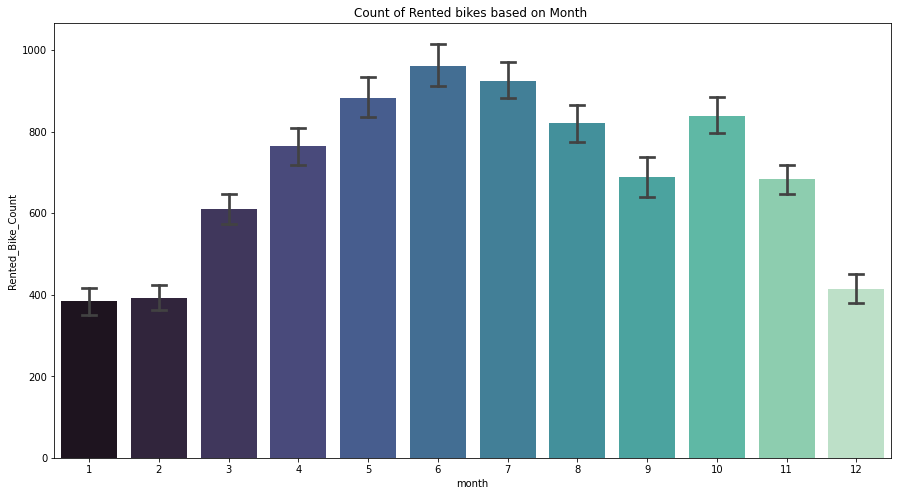

In [64]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Rented_Bike_Count  8760 non-null   int64         
 2   Hour               8760 non-null   category      
 3   Temperature        8760 non-null   float64       
 4   Humidity           8760 non-null   int64         
 5   Wind_speed         8760 non-null   float64       
 6   Visibility         8760 non-null   int64         
 7   Solar_Radiation    8760 non-null   float64       
 8   Rainfall           8760 non-null   float64       
 9   Snowfall           8760 non-null   float64       
 10  Seasons            8760 non-null   object        
 11  Holiday            8760 non-null   object        
 12  Functioning_Day    8760 non-null   object        
 13  year               8760 non-null   int64         
 14  month   

In [66]:
dataset.isna().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
year                 0
month                0
day                  0
weekday_weekend      0
dtype: int64

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

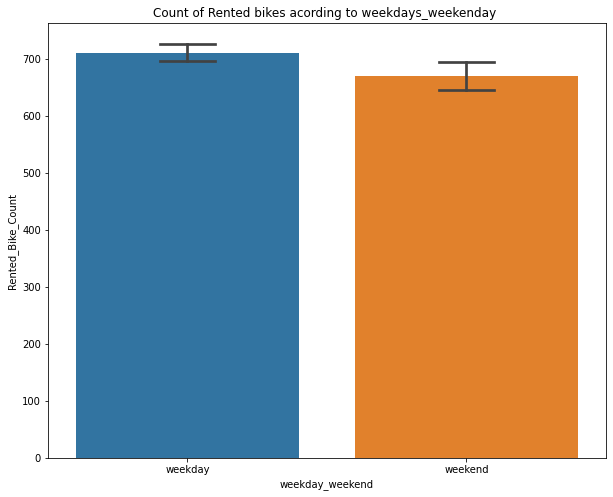

In [67]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='weekday_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

**Weekday has maximum bike count than weekend from above plot we conclude.**

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

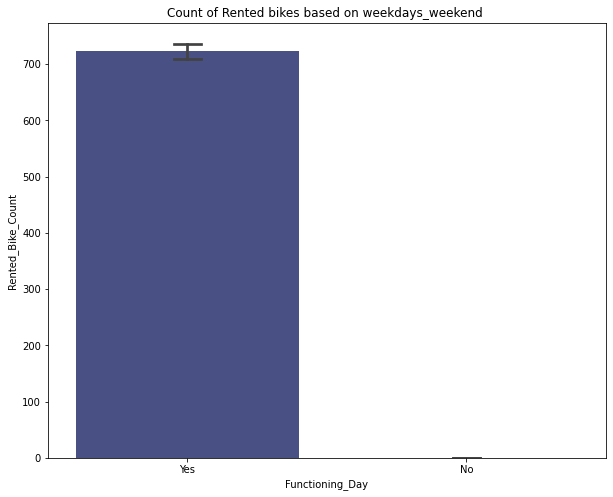

In [68]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

**People use rented bike only in functioning day**

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

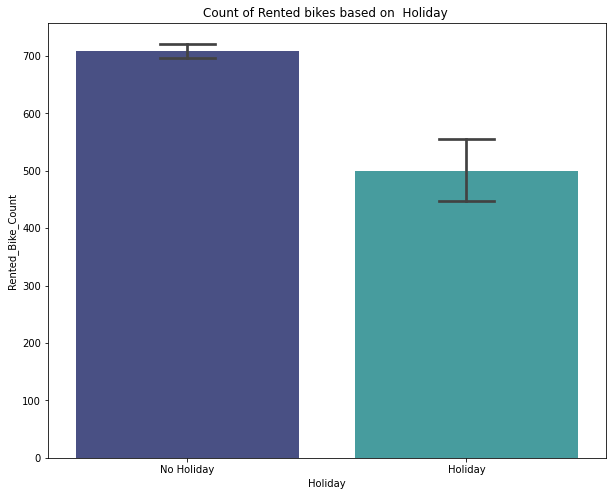

In [69]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

**Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.**

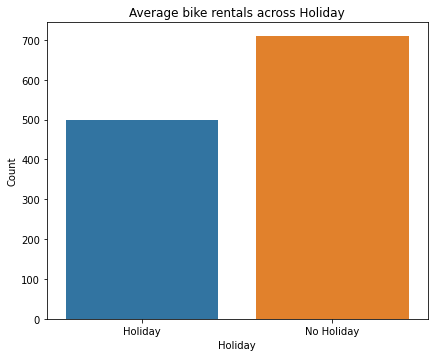

In [70]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(dataset.groupby(['Holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

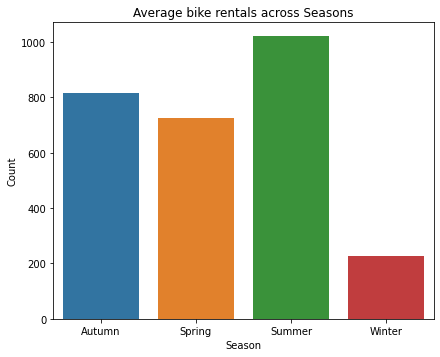

In [71]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(dataset.groupby(['Seasons'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Seasons', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')
plt.show()

**Finding Correlation between dependent and independant variables**

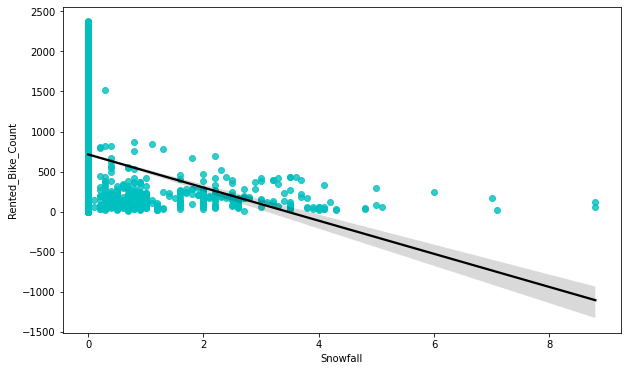

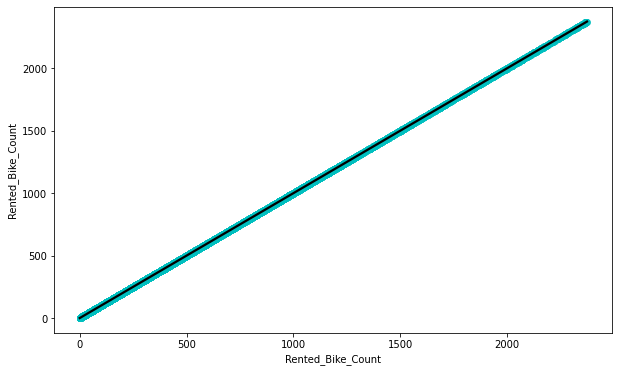

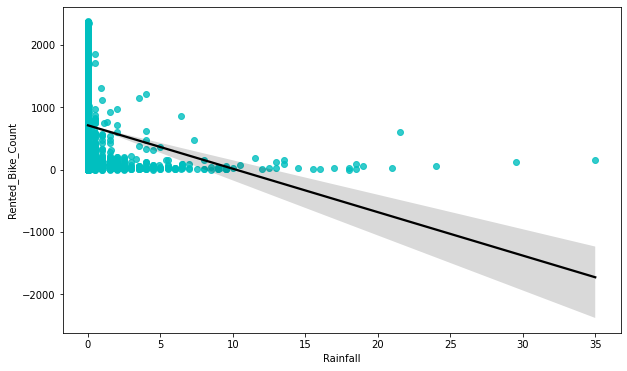

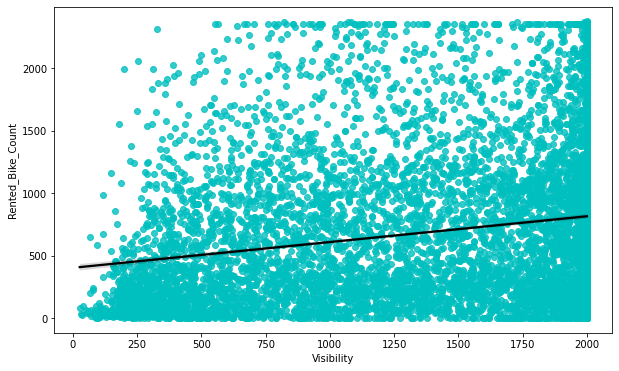

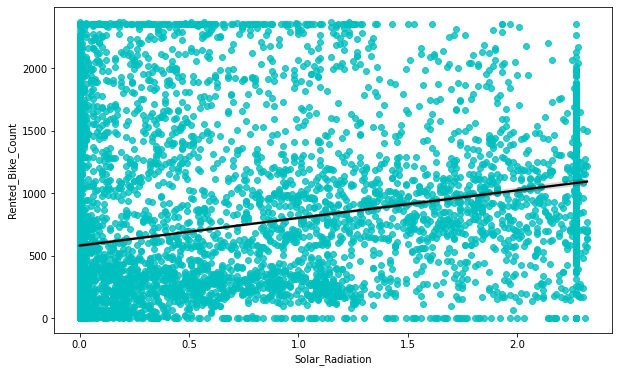

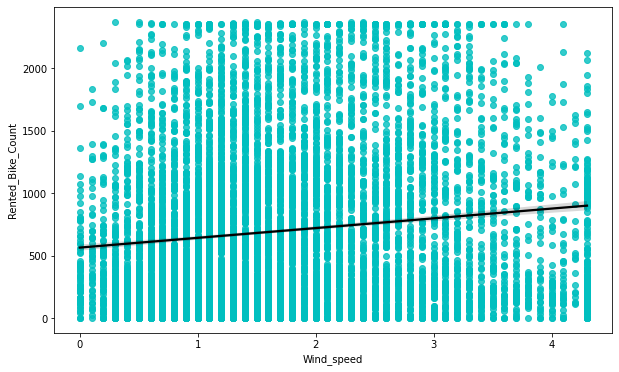

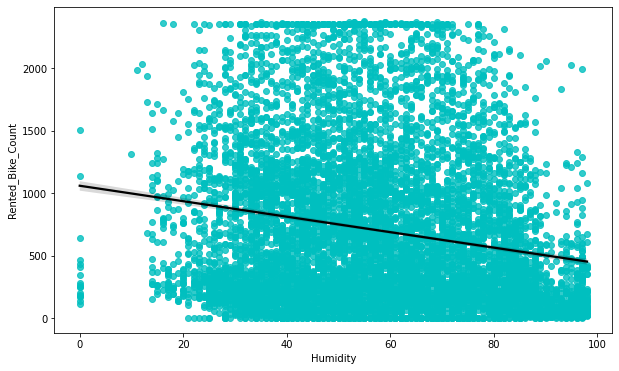

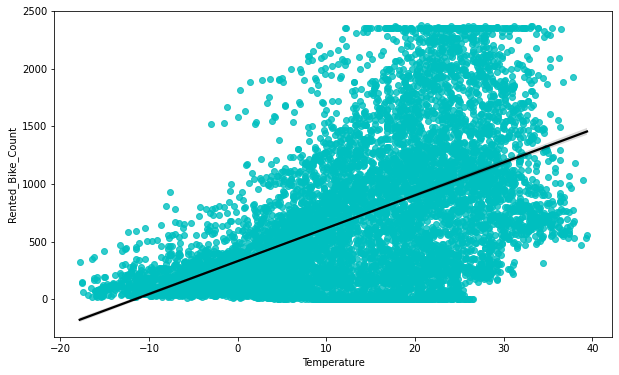

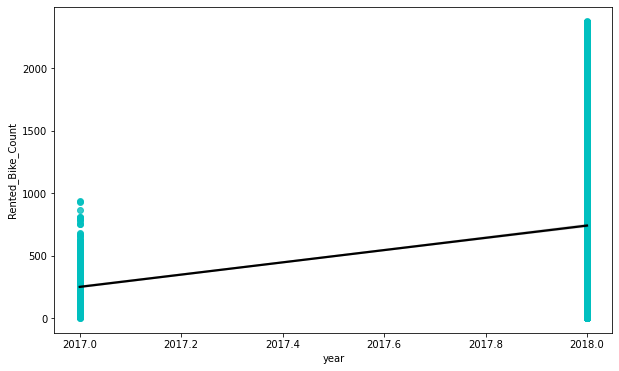

In [72]:
#plotting the regression plot for all the numerical features
for fet in num_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[fet],y=dataset['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

**Observations:**


*  The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*  Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.


In [73]:
# creating a dataframe containing the count of bikes rented in different temperature

dataset_temp = pd.DataFrame(dataset.groupby('Temperature')['Rented_Bike_Count'].sum())
dataset_temp.reset_index(inplace=True)
dataset_temp

,Temperature,Rented_Bike_Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


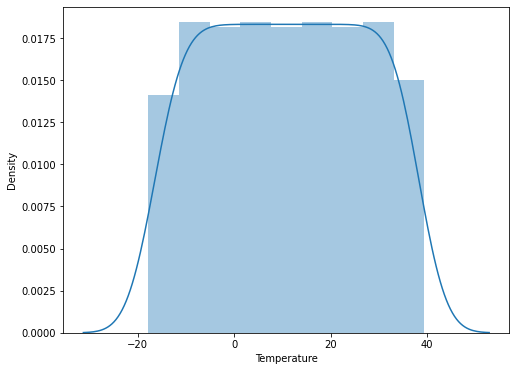

In [74]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(dataset_temp['Temperature'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [75]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

dataset_visi = pd.DataFrame(dataset.groupby('Visibility')['Rented_Bike_Count'].sum())
dataset_visi.reset_index(inplace=True)

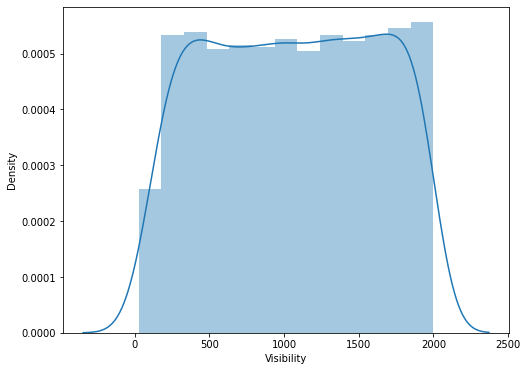

In [76]:
plt.figure(figsize=(8,6))
sns.distplot(dataset_visi['Visibility'])

In [77]:
dataset.isna().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
year                 0
month                0
day                  0
weekday_weekend      0
dtype: int64

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**

In [78]:
# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.

dataset=dataset.drop(columns=['Date','day','year'],axis=1)

**Label Encoding for ordinal values**

In [79]:
dataset['Functioning_Day']=dataset['Functioning_Day'].replace({'Yes':1,'No':0})

In [80]:
dataset['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [81]:
dataset['Holiday']=dataset['Holiday'].replace({'Holiday':0,'No Holiday':1})

In [82]:
dataset['weekday_weekend']=dataset['weekday_weekend'].replace({'weekday':1,'weekend':0})

In [83]:
# Using Pandas get Dummies for Encoding categorical features
dataset1 = pd.get_dummies(dataset,drop_first=True,sparse=False)
dataset1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   int64   
 11  Functioning_Day    8760 non-null   int64   
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   int64   
dtypes: category(2), float64(5), int64(6), object(1)
memory usage: 839.6+ KB


In [85]:
dataset.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,1,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,1,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,1,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,1,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,1,1,1,1


In [86]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Temperature        8760 non-null   float64
 2   Humidity           8760 non-null   int64  
 3   Wind_speed         8760 non-null   float64
 4   Visibility         8760 non-null   int64  
 5   Solar_Radiation    8760 non-null   float64
 6   Rainfall           8760 non-null   float64
 7   Snowfall           8760 non-null   float64
 8   Holiday            8760 non-null   int64  
 9   Functioning_Day    8760 non-null   int64  
 10  weekday_weekend    8760 non-null   int64  
 11  Hour_1             8760 non-null   uint8  
 12  Hour_2             8760 non-null   uint8  
 13  Hour_3             8760 non-null   uint8  
 14  Hour_4             8760 non-null   uint8  
 15  Hour_5             8760 non-null   uint8  
 16  Hour_6             8760 

###**Normalising Rented_Bike_Count Column Data.**


####Observations:


*  Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.


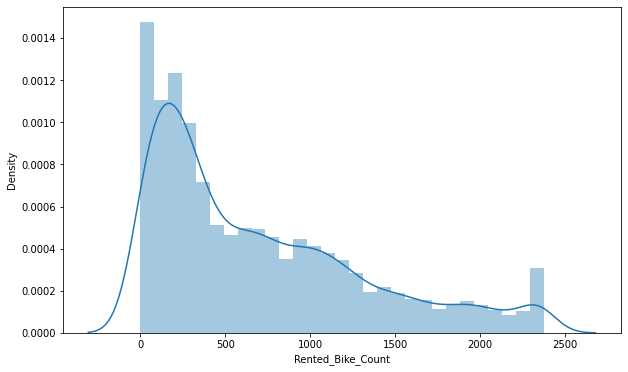

In [87]:
plt.figure(figsize=(10,6))
sns.distplot((dataset1['Rented_Bike_Count']))  # distribution plot creation

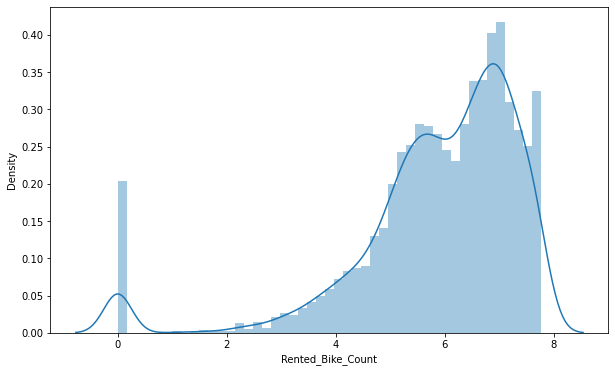

In [88]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.log1p(dataset1['Rented_Bike_Count']))

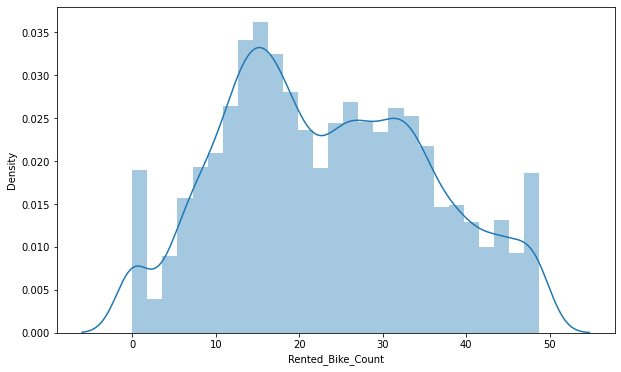

In [89]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(dataset1['Rented_Bike_Count']))

**Model Training**

**Separating dependant and independant variables**

In [ ]:
# Data spliting and value assigning to variables for Reggression

#X = dataset1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
#y = np.sqrt(dataset1['Rented_Bike_Count'])

In [90]:

X = dataset1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.log1p(dataset1['Rented_Bike_Count'])

In [91]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,weekday_weekend,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y.head()

0    5.541264
1    5.323010
2    5.159055
3    4.682131
4    4.369448
Name: Rented_Bike_Count, dtype: float64

In [93]:
dataset1.isna().sum()

Rented_Bike_Count    0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Holiday              0
Functioning_Day      0
weekday_weekend      0
Hour_1               0
Hour_2               0
Hour_3               0
Hour_4               0
Hour_5               0
Hour_6               0
Hour_7               0
Hour_8               0
Hour_9               0
Hour_10              0
Hour_11              0
Hour_12              0
Hour_13              0
Hour_14              0
Hour_15              0
Hour_16              0
Hour_17              0
Hour_18              0
Hour_19              0
Hour_20              0
Hour_21              0
Hour_22              0
Hour_23              0
Seasons_Spring       0
Seasons_Summer       0
Seasons_Winter       0
month_2              0
month_3              0
month_4              0
month_5              0
month_6              0
month_7              0
month_8    

# **Implementing Linear Regression.**

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.20, random_state = 0)
print(X_train.shape)
X_test.shape


(7008, 47)


(1752, 47)

In [96]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [97]:
# initalizing the model
regg = LinearRegression().fit(X_train_std ,y_train)

In [98]:
# Checking score
regg.score(X_train_std,y_train)

0.8419974153162242

In [99]:
#Checking Coefficent
regg.coef_

array([ 0.51379643, -0.30076959, -0.03735228,  0.03556317,  0.06492751,
       -0.24487103, -0.01567976,  0.07652417,  1.1374186 ,  0.03483995,
       -0.03343091, -0.103396  , -0.16656514, -0.23330171, -0.22220204,
       -0.09622105,  0.02612662,  0.09805486,  0.01569798, -0.06099103,
       -0.06349666, -0.05251666, -0.05233185, -0.05963933, -0.04886555,
       -0.01989438,  0.02994239,  0.10644653,  0.07326907,  0.0682957 ,
        0.08433493,  0.06336972,  0.01423369, -0.10691092, -0.11858576,
       -0.26542244, -0.00496584,  0.04104459,  0.00451226,  0.03750712,
        0.10362607,  0.02003504, -0.00701025,  0.02467167,  0.07640993,
        0.06097477,  0.03349414])

In [100]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train_std)
y_pred_test = regg.predict(X_test_std)

In [101]:
y_pred_test[:6]

array([5.13624609, 6.08968027, 5.61171969, 5.53808424, 7.28082666,
       5.4561703 ])

In [102]:
y_test[:6]

4059    5.771441
6914    6.364751
233     5.424950
982     5.111988
5967    6.472346
2182    5.252273
Name: Rented_Bike_Count, dtype: float64

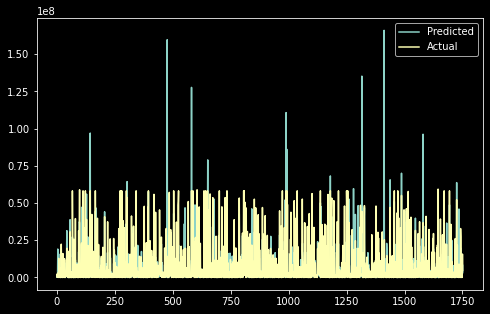

In [191]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [103]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.3851050618243563
RMSE : 0.6205683377552841
MAE : 0.43133304577697096
R2 : 0.8419974153162242
Adjusted R2 : 0.8376393628044064


In [104]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [105]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.3654626478005656
RMSE : 0.6045350674696759
MAE : 0.4248468842906076
R2 : 0.8630960604363349
Adjusted R2 : 0.8593199541220788


In [106]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

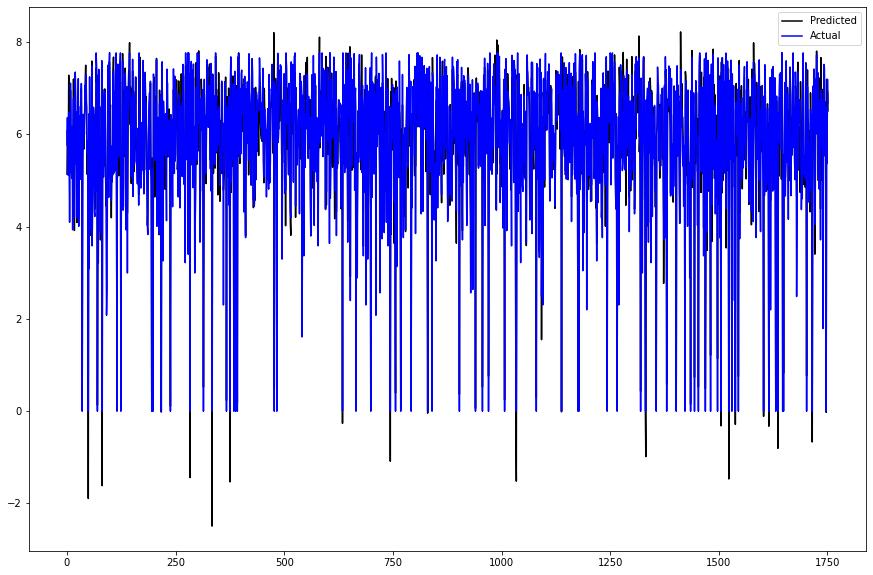

In [107]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

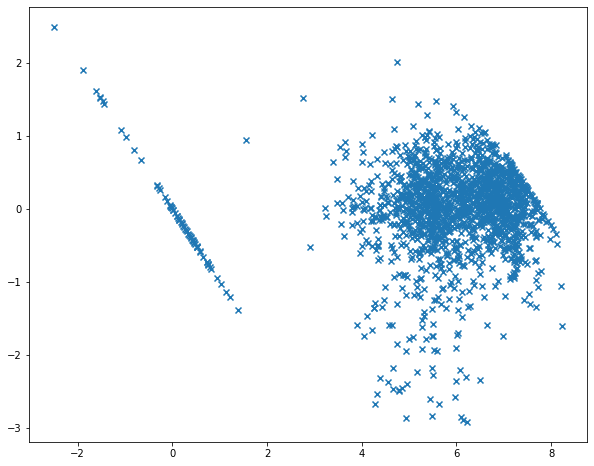

In [108]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

# **Implementing Lasso regression** (L1 Regularization)

In [109]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train_std, y_train)

# Creating the model score
print(lasso.score(X_test_std, y_test))
print(lasso.score(X_train_std, y_train))


0.07022961677147688
0.0657827084800825


In [110]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train_std)
y_pred_test_lasso=lasso.predict(X_test_std)

In [111]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.2769995093953854
RMSE : 1.5089729982327005
MAE : 1.1084246604832562
R2 : 0.0657827084800825
Adjusted R2 : 0.04001497802149312


In [112]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [113]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.482005610534132
RMSE : 1.5754382280921497
MAE : 1.1371787856006152
R2 : 0.07022961677147688
Adjusted R2 : 0.044584541647215925


In [114]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

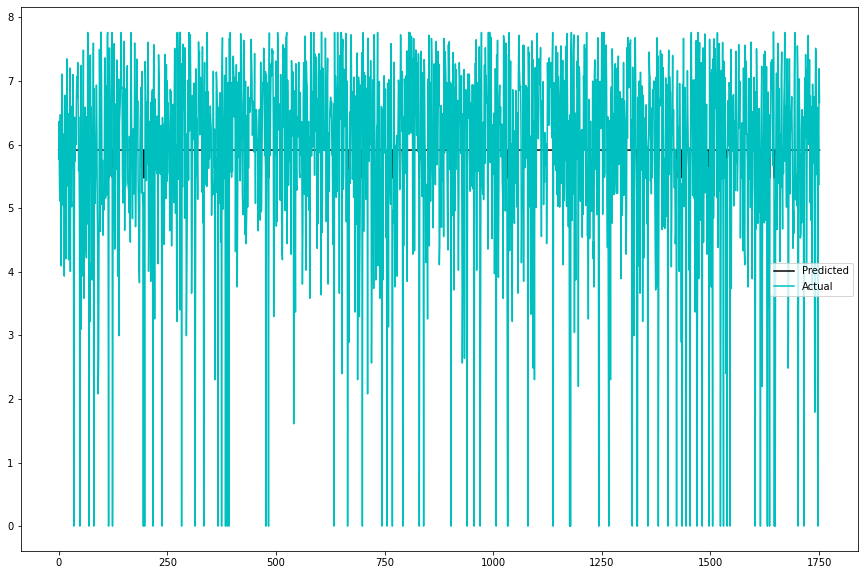

In [115]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

In [185]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [186]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.3909439038744431


In [189]:
y_pred_lasso = lasso_regressor.predict(X_test_std)

In [193]:
# Predicted Train & Test values
y_pred_train_lassocv=lasso_regressor.predict(X_train_std)
y_pred_test_lassocv=lasso_regressor.predict(X_test_std)

In [194]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lassocv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lassocv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lassocv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lassocv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.3851064422323622
RMSE : 0.6205694499670139
MAE : 0.43133317734890125
R2 : 0.8419968489564058
Adjusted R2 : 0.8376387808231611


In [195]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression with CV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [196]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lassocv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lassocv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lassocv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lassocv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.36547171189124905
RMSE : 0.6045425641683545
MAE : 0.42483462417099355
R2 : 0.8630926649874959
Adjusted R2 : 0.859316465019428


In [197]:
dict2={'Model':'Lasso regression with cv',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

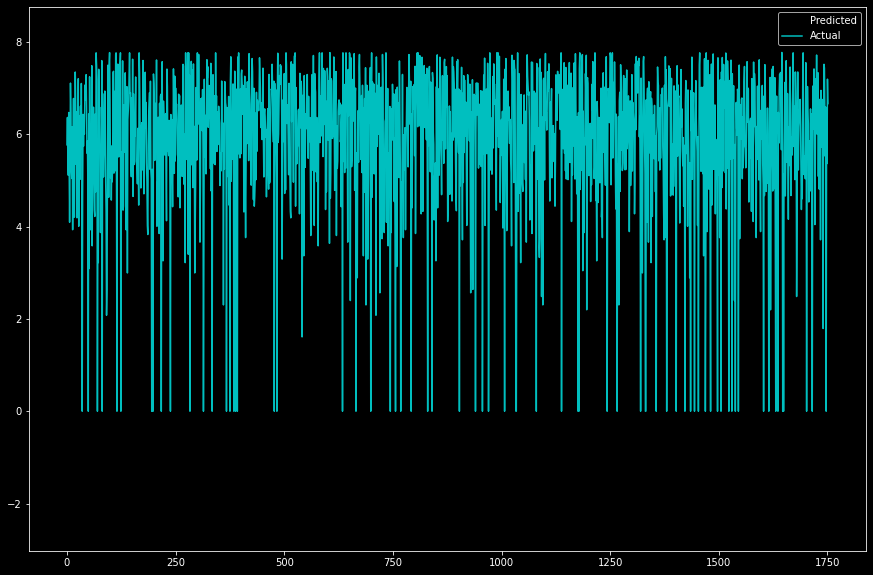

In [198]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lassocv, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Ridge regression** (L2 Regularization)

In [116]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train_std,y_train)

Ridge(alpha=0.1)

In [117]:
#checking score
ridge.score(X_train_std,y_train)

0.8419974149626646

In [118]:
# Predicted Train & Test values
y_pred_train_ridge=ridge.predict(X_train_std)
y_pred_test_ridge=ridge.predict(X_test_std)

In [119]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.3851050626860989
RMSE : 0.6205683384496012
MAE : 0.4313337975547873
R2 : 0.8419974149626646
Adjusted R2 : 0.8376393624410948


In [120]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [121]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.3654639337955513
RMSE : 0.6045361310918904
MAE : 0.42484925264286016
R2 : 0.8630955786968716
Adjusted R2 : 0.8593194590952008


In [122]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

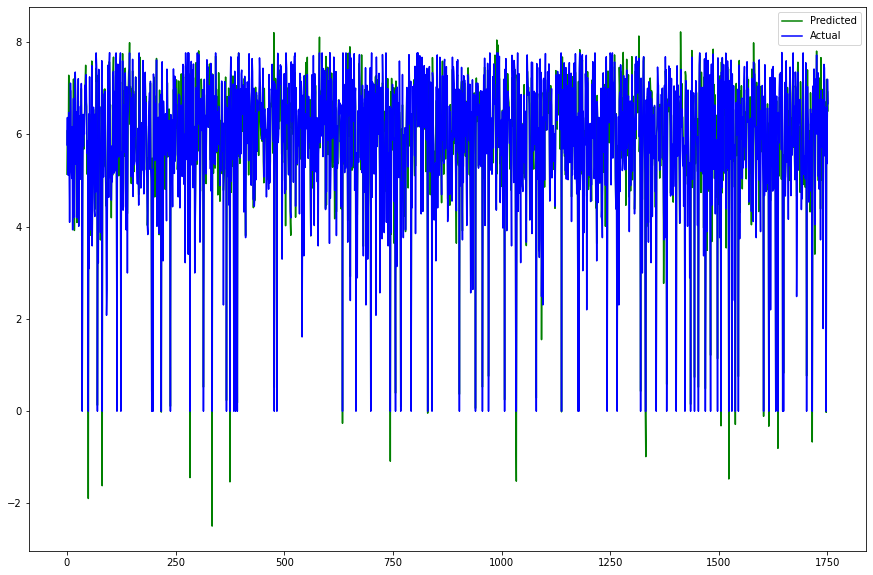

In [123]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='g')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

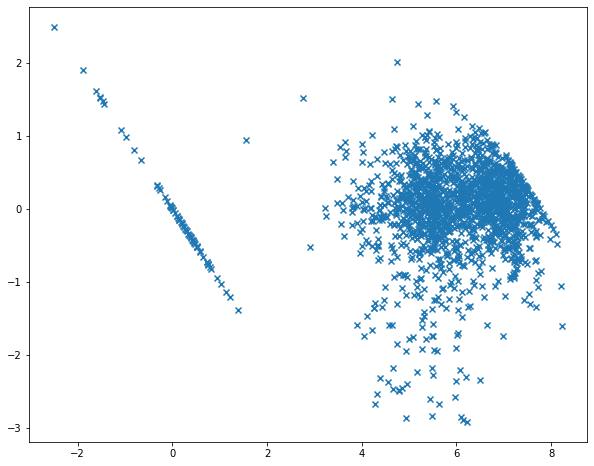

In [124]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

In [199]:
### Cross validation
ridge1 = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
Ridge_regressor = GridSearchCV(ridge1, parameters, scoring='neg_mean_squared_error', cv=3)
Ridge_regressor.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [200]:
print("The best fit alpha value is found out to be :" ,Ridge_regressor.best_params_)
print("\nUsing ",Ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.3909439038744431


In [201]:
# Predicted Train & Test values
y_pred_train_ridgecv=Ridge_regressor.predict(X_train_std)
y_pred_test_ridgecv=Ridge_regressor.predict(X_test_std)

In [202]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridgecv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridgecv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridgecv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridgecv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.3851135124202139
RMSE : 0.6205751464731841
MAE : 0.43141928195936646
R2 : 0.8419939481688922
Adjusted R2 : 0.8376358000256632


In [203]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression with CV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [204]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridgecv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridgecv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridgecv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridgecv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.36559967007252997
RMSE : 0.6046483854874087
MAE : 0.4250886366869794
R2 : 0.8630447312814875
Adjusted R2 : 0.8592672091982891


In [205]:
dict2={'Model':'Ridge regression with cv',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

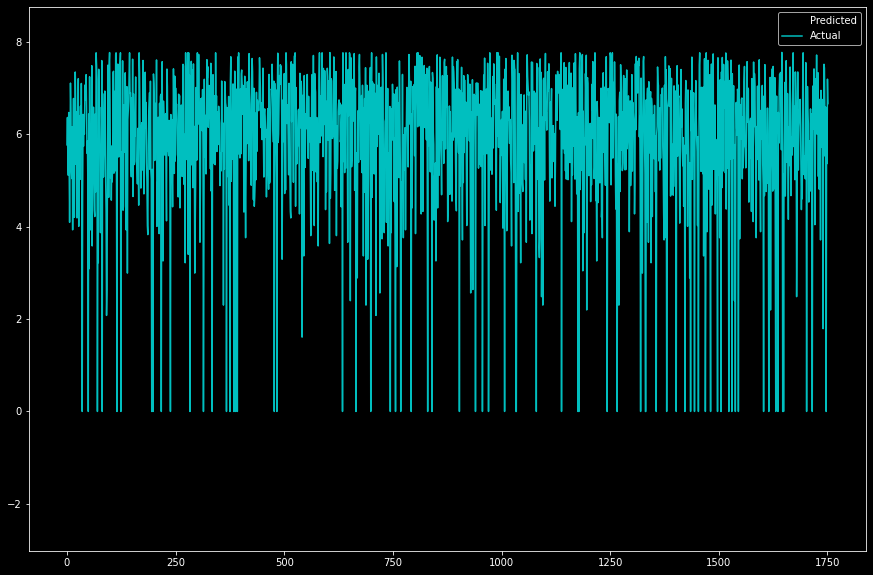

In [206]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridgecv, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

In [125]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [126]:
elasnet.fit(X_train_std,y_train)

ElasticNet(alpha=0.1)

In [127]:
#checking score
elasnet.score(X_train_std, y_train)

0.8071697784181446

In [128]:
# Train Test values
y_pred_train_en=elasnet.predict(X_train_std)
y_pred_test_en=elasnet.predict(X_test_std)

In [129]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.4699916431905681
RMSE : 0.6855593651833283
MAE : 0.4991897459474276
R2 : 0.8071697784181446
Adjusted R2 : 0.8018511044660629


In [130]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [131]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.4590708453730759
RMSE : 0.6775476701849663
MAE : 0.4972675535547841
R2 : 0.8280300116889292
Adjusted R2 : 0.8232867080207248


In [132]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

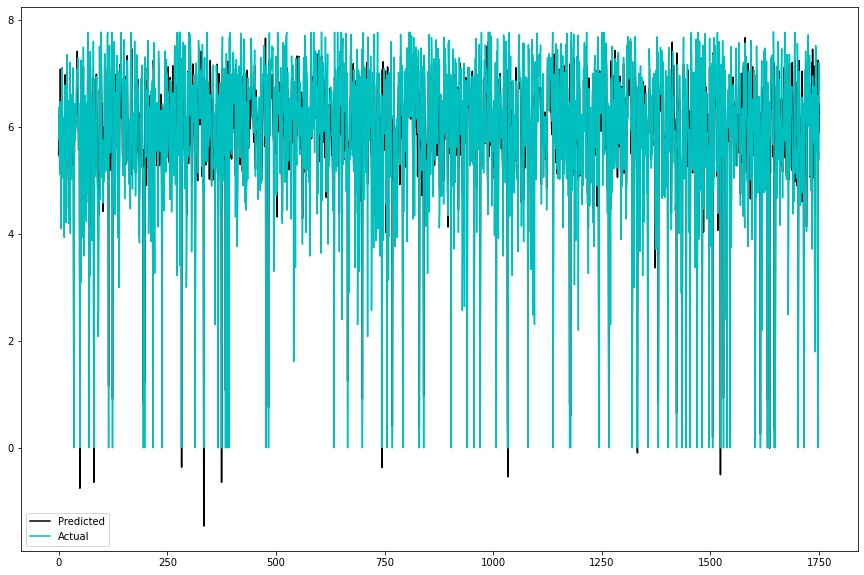

In [133]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

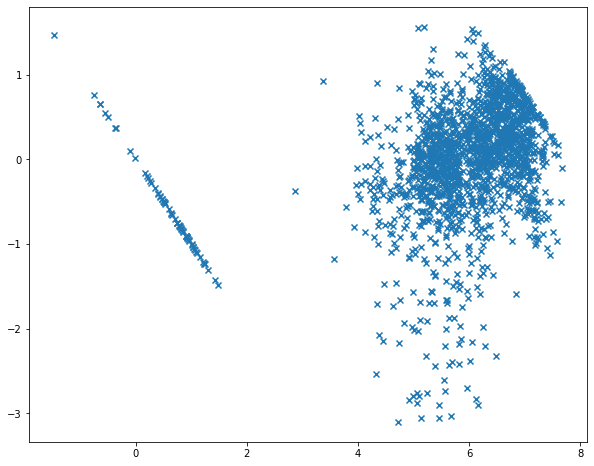

In [134]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [135]:
#Initilazing the model
dt_regr = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [136]:
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [137]:
#Train Test values
y_pred_train_d = dt_regr.predict(X_train)
y_pred_test_d = dt_regr.predict(X_test)

In [138]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.35391127505246683
RMSE : 0.5949044251411035
MAE : 0.43722536057605665
R2 : 0.854795738227599
Adjusted R2 : 0.8507906911012476


In [139]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [140]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.45869373274632125
RMSE : 0.6772693206888388
MAE : 0.4738428389229738
R2 : 0.8281712797626233
Adjusted R2 : 0.8234318725729773


In [141]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

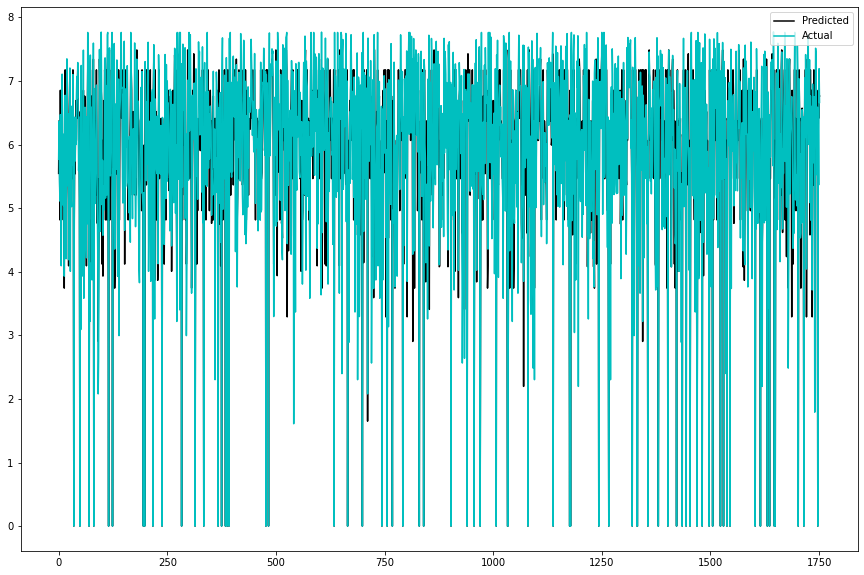

In [142]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

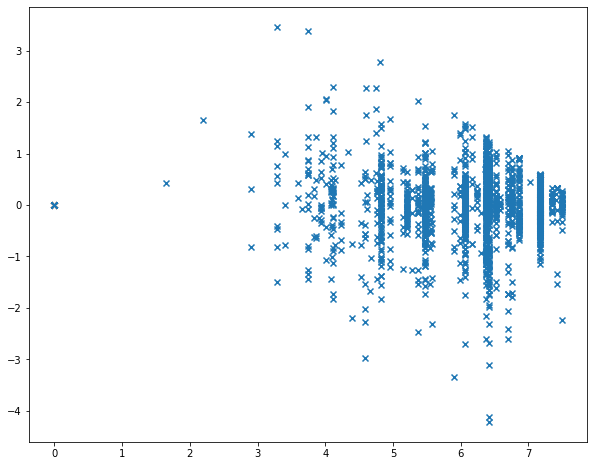

In [143]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

# **Implementng Random Forest Regression** 

In [144]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [145]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [146]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [147]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.02266681643964051
RMSE : 0.15055502794540113
MAE : 0.09287144616784601
R2 : 0.9907001596731819
Adjusted R2 : 0.9904436499928061


In [148]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [149]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.19402969989899915
RMSE : 0.4404880246942011
MAE : 0.26057764433569974
R2 : 0.9273156081246792
Adjusted R2 : 0.9253108156257707


In [150]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [151]:
# Feature importances
rf_model.feature_importances_

array([1.87255985e-01, 7.78598580e-02, 1.04771213e-02, 1.25665962e-02,
       2.32015468e-02, 7.57567679e-02, 1.80244966e-03, 2.64548097e-03,
       4.76341111e-01, 4.63857859e-03, 3.65870175e-03, 8.27355578e-03,
       1.39939977e-02, 2.34615765e-02, 2.18973502e-02, 7.56086837e-03,
       1.89098650e-03, 3.84829394e-03, 5.04016647e-04, 1.15324542e-03,
       5.53660185e-04, 3.30426919e-04, 1.26264754e-04, 1.75740992e-04,
       5.41808982e-04, 8.49138999e-04, 2.07183872e-03, 4.45642403e-03,
       2.76486985e-03, 1.85340958e-03, 1.55494739e-03, 1.08170482e-03,
       1.05970149e-03, 3.64396180e-03, 8.38068017e-04, 5.20882118e-03,
       1.07560808e-03, 1.49721282e-03, 1.26963188e-03, 8.72252026e-04,
       9.74595723e-04, 5.26165602e-04, 2.66116067e-03, 1.12707884e-03,
       1.18914481e-03, 1.88237224e-03, 1.02590099e-03])

In [152]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [153]:
plt.style.use('dark_background')

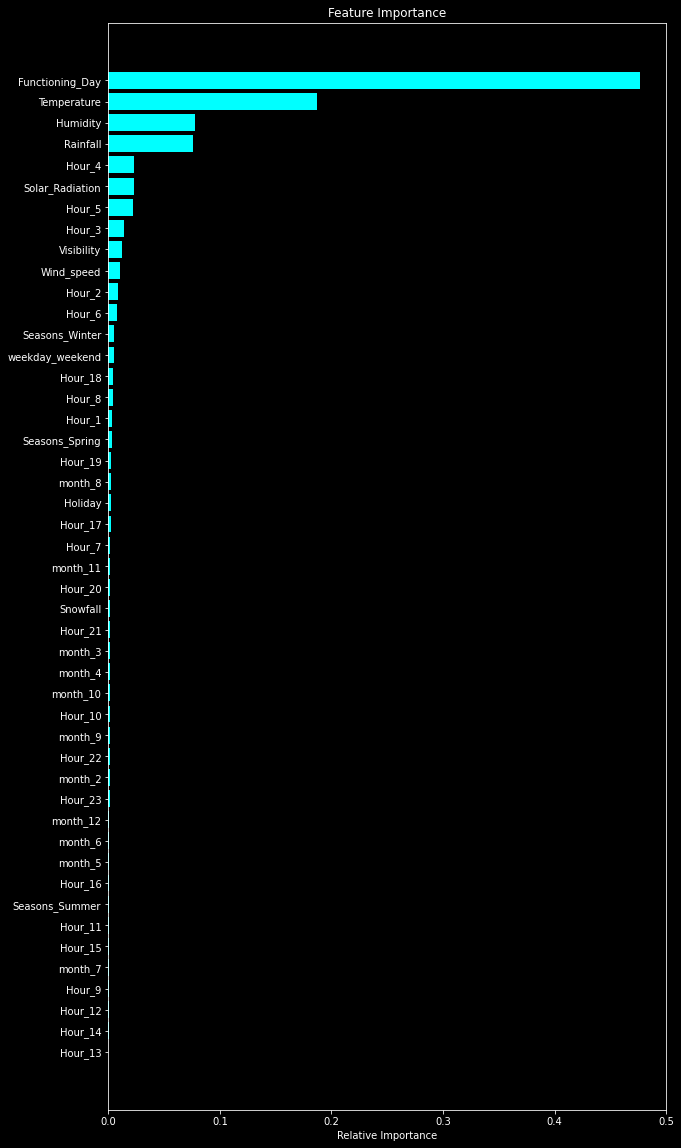

In [154]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Implementing XG Boost Regression**

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   int64   
 11  Functioning_Day    8760 non-null   int64   
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   int64   
dtypes: category(2), float64(5), int64(6), object(1)
memory usage: 839.6+ KB


In [156]:
x = dataset1.drop('Rented_Bike_Count', axis=1)
y = np.log1p(dataset1['Rented_Bike_Count'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [157]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8760 non-null   float64
 1   Humidity         8760 non-null   int64  
 2   Wind_speed       8760 non-null   float64
 3   Visibility       8760 non-null   int64  
 4   Solar_Radiation  8760 non-null   float64
 5   Rainfall         8760 non-null   float64
 6   Snowfall         8760 non-null   float64
 7   Holiday          8760 non-null   int64  
 8   Functioning_Day  8760 non-null   int64  
 9   weekday_weekend  8760 non-null   int64  
 10  Hour_1           8760 non-null   uint8  
 11  Hour_2           8760 non-null   uint8  
 12  Hour_3           8760 non-null   uint8  
 13  Hour_4           8760 non-null   uint8  
 14  Hour_5           8760 non-null   uint8  
 15  Hour_6           8760 non-null   uint8  
 16  Hour_7           8760 non-null   uint8  
 17  Hour_8        

In [158]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Temperature        8760 non-null   float64
 2   Humidity           8760 non-null   int64  
 3   Wind_speed         8760 non-null   float64
 4   Visibility         8760 non-null   int64  
 5   Solar_Radiation    8760 non-null   float64
 6   Rainfall           8760 non-null   float64
 7   Snowfall           8760 non-null   float64
 8   Holiday            8760 non-null   int64  
 9   Functioning_Day    8760 non-null   int64  
 10  weekday_weekend    8760 non-null   int64  
 11  Hour_1             8760 non-null   uint8  
 12  Hour_2             8760 non-null   uint8  
 13  Hour_3             8760 non-null   uint8  
 14  Hour_4             8760 non-null   uint8  
 15  Hour_5             8760 non-null   uint8  
 16  Hour_6             8760 

In [159]:
# Initializing the model
xgb_r = XGBRegressor()

In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   int64   
 11  Functioning_Day    8760 non-null   int64   
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   int64   
dtypes: category(2), float64(5), int64(6), object(1)
memory usage: 839.6+ KB


In [161]:
#Fitting the model
xgb_r.fit(x_train, y_train)

[10:07:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [162]:
#Train Test values
y_pred_train_xgb1 = xgb_r.predict(x_train)
y_pred_test_xgb1 = xgb_r.predict(x_test)

In [163]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.200565311983379
RMSE : 0.44784518751838676
MAE : 0.32148154383768873
R2 : 0.917711188886592
Adjusted R2 : 0.9154414857631588


In [164]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [165]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.2464467105988137
RMSE : 0.49643399420145845
MAE : 0.34649095950540015
R2 : 0.9076799618879359
Adjusted R2 : 0.905133575860197


In [166]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [167]:
# Feature importances
xgb_r.feature_importances_

array([0.0621786 , 0.03836456, 0.00161132, 0.00513895, 0.03902596,
       0.06697546, 0.00544127, 0.00534629, 0.41656536, 0.00424819,
       0.00470198, 0.01511843, 0.02558198, 0.04074503, 0.03514716,
       0.01591759, 0.        , 0.00967713, 0.        , 0.00619717,
       0.00405594, 0.        , 0.        , 0.00164838, 0.        ,
       0.        , 0.00679269, 0.01990747, 0.0139004 , 0.01208897,
       0.01757397, 0.01514451, 0.        , 0.0022367 , 0.00212637,
       0.07804378, 0.00194087, 0.00206281, 0.00178437, 0.        ,
       0.00367376, 0.        , 0.00354035, 0.        , 0.00860903,
       0.00560078, 0.00128627], dtype=float32)

In [168]:
features = x_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

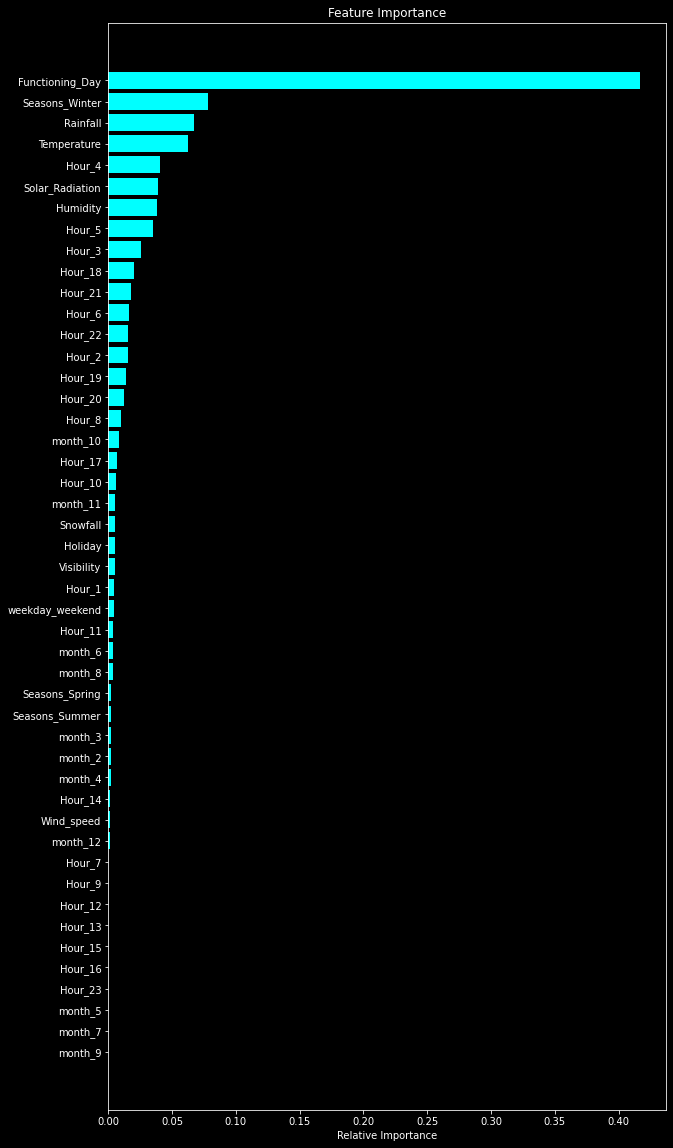

In [169]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**
## ***For improvement of our model let's do some Hyper parameter tuning.***

## **XG boost Regressor with GridSearchCV**

In [170]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [171]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [172]:
# Create an instance of the XG Boost Regressor
xg_boost = XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[10:08:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:08:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:08:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:08:22] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [173]:
xg_grid.best_estimator_


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [174]:
xg_optimal_model = xg_grid.best_estimator_

In [175]:
xg_optimal_model.fit(x_train,y_train)

[10:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [176]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(x_train)
y_pred_test_xg_opt= xg_optimal_model.predict(x_test)

In [177]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.0461813011764654
RMSE : 0.21489835079978023
MAE : 0.14687809073664632
R2 : 0.9810525342996674
Adjusted R2 : 0.9805299222762428


In [178]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [179]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.17322077965313093
RMSE : 0.4161980053449691
MAE : 0.25340089946393807
R2 : 0.9351107225553066
Adjusted R2 : 0.9333209361469142


In [180]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [181]:
xg_optimal_model.feature_importances_

array([1.0204720e-02, 6.1383354e-03, 6.0250488e-04, 1.0625843e-03,
       4.1182246e-03, 2.8983453e-02, 1.0442458e-03, 2.2781796e-03,
       7.3627728e-01, 1.9114524e-03, 2.8816340e-03, 1.2982642e-02,
       1.6830295e-02, 2.2026634e-02, 2.6926907e-02, 8.8940309e-03,
       2.1885741e-03, 5.7885353e-03, 9.2358462e-04, 3.9771446e-03,
       1.9107964e-03, 7.7527663e-04, 8.4302470e-04, 4.3363657e-04,
       6.1117578e-04, 1.1949261e-03, 5.6838188e-03, 8.2125850e-03,
       7.4099489e-03, 7.5701303e-03, 1.1638143e-02, 9.4038993e-03,
       2.7942790e-03, 4.3402645e-03, 7.9705863e-04, 2.3396535e-02,
       1.0760590e-03, 9.6783123e-04, 1.1551713e-03, 1.0300659e-03,
       1.5198305e-03, 8.1950199e-04, 3.7092110e-03, 9.9863776e-04,
       1.1274911e-03, 2.5922863e-03, 1.9474836e-03], dtype=float32)

In [182]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

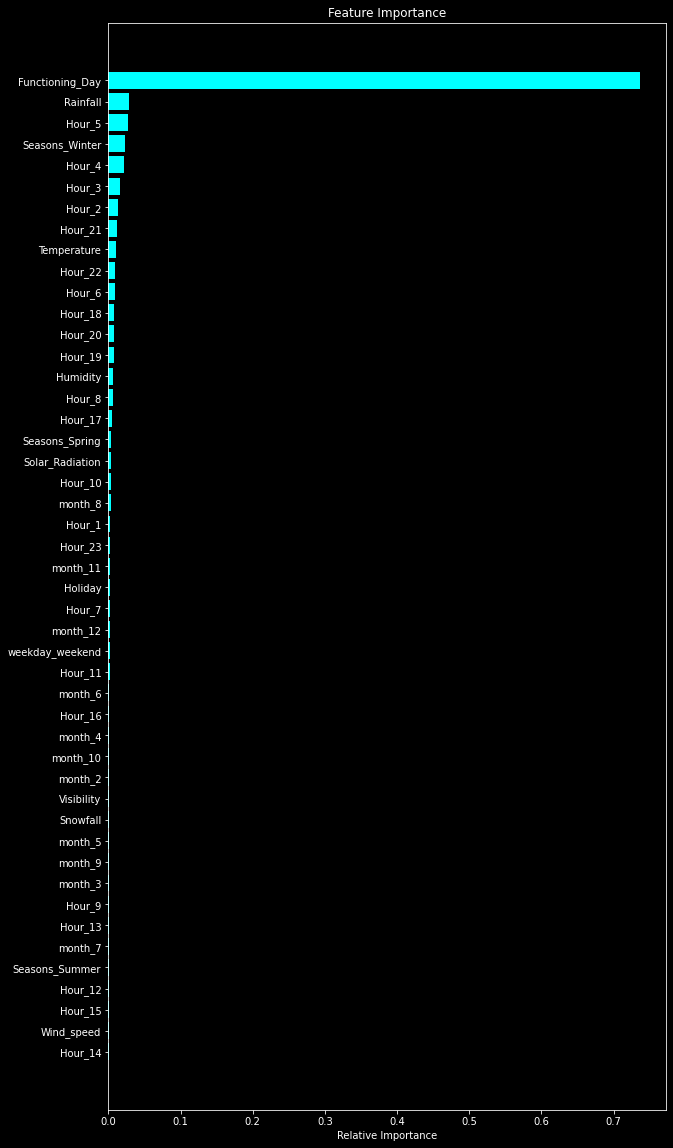

In [183]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features and one hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. Did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation:** 

In [207]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE    MSE   RMSE     R2  Adj_R2
Training set 0          Linear regression   0.431  0.385  0.621  0.842    0.84
             1            Lasso regression  1.108  2.277  1.509  0.066    0.04
             2            Ridge regression  0.431  0.385  0.621  0.842    0.84
             3       Elasticnet regression  0.499  0.470  0.686  0.807    0.80
             4    Decision tree regression  0.437  0.354  0.595  0.855    0.85
             5    Random forest regression  0.093  0.023  0.151  0.991    0.99
             6         XG Boost Regression  0.321  0.201  0.448  0.918    0.92
             7  XG boost regg GridserachCV  0.147  0.046  0.215  0.981    0.98
             8    Lasso regression with CV  0.431  0.385  0.621  0.842    0.84
             9    Ridge regression with CV  0.431  0.385  0.621  0.842    0.84
Test set     0          Linear regression   0.425  0.365  0.605  0.863    0.86
             1            Lasso regression  1.137  2.482  1.575  0.070    0.04
             2            Ridge regression  0.425  0.365  0.605  0.863    0.86
             3       Elasticnet regression  0.497  0.459  0.678  0.828    0.82
             4    Decision tree regression  0.474  0.459  0.677  0.828    0.82
             5    Random forest regression  0.261  0.194  0.440  0.927    0.93
             6         XG Boost Regression  0.346  0.246  0.496  0.908    0.91
             7  XG boost regg GridserachCV  0.253  0.173  0.416  0.935    0.93
             8    Lasso regression with cv  0.425  0.365  0.605  0.863    0.86
             9    Ridge regression with cv  0.425  0.366  0.605  0.863    0.86

# **Final Observations:**

*    **Out of all above models Random forest Regressor gives the highest R2 score of 92% for Test Set and XG Boost Gridsearch CV gives the highest R2 score of 93.5% for Test set.**

*   **No overfitting is seen.**
*  **We can deploy XG Boost Gridsearch CV model.**


*   Hour of the day holds most importance among all the features for prediction of dataset
*   We observed that the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
*   As we can see the top 5 important features of our dataset are: Functioning day,Hour,Season_winter, Temperature,Rainfall,Humidity
*   Peoples dont use rented bikes in no functioning day.
*   people tend to rent bikes when the temperature is between -5 to 25 degrees.
*    people tend to rent bikes when the visibility is between 300 to 1700
*  for all the above experiments we can conclude that Random Forest  and XGBoost regressor with using hyperparameters we got the best results
